In [56]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#parse dates to bring dates in datetime format
train_set=pd.read_csv('train.csv',parse_dates=['first_active_month'])
test_set=pd.read_csv('test.csv',parse_dates=['first_active_month'])
print(train_set.shape)
print(test_set.shape)
print(train_set.head(5))
print(test_set.head(5))

(201917, 6)
(123623, 5)
  first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749  
  first_active_month          card_id  feature_1  feature_2  feature_3
0         2017-04-01  C_ID_0ab67a22ab          3          3          1
1         2017-01-01  C_ID_130fd0cbdd          2          3          0
2         2017-08-01  C_ID_b709037bc5          5          1          1
3         2017-12-01  C_ID_d27d835a9f          2          1          0
4         2015-12-01  C_ID_2b5e3df5c2          5          1          1


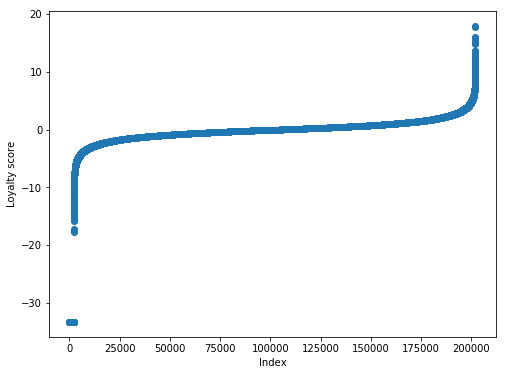

In [58]:
target_col='target'
plt.figure(figsize=(8,6))
plt.scatter(range(train_set.shape[0]),np.sort(train_set[target_col].values))
plt.xlabel('Index')
plt.ylabel('Loyalty score')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


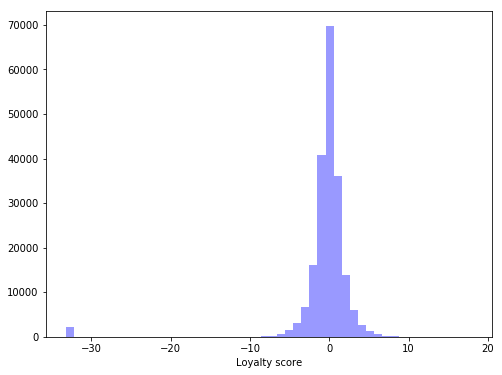

In [59]:
#Histogram of the loyalty score
plt.figure(figsize=(8,6))
sns.distplot(train_set[target_col].values,bins=50,kde=False,color='blue')
plt.xlabel('Loyalty score')
plt.show()

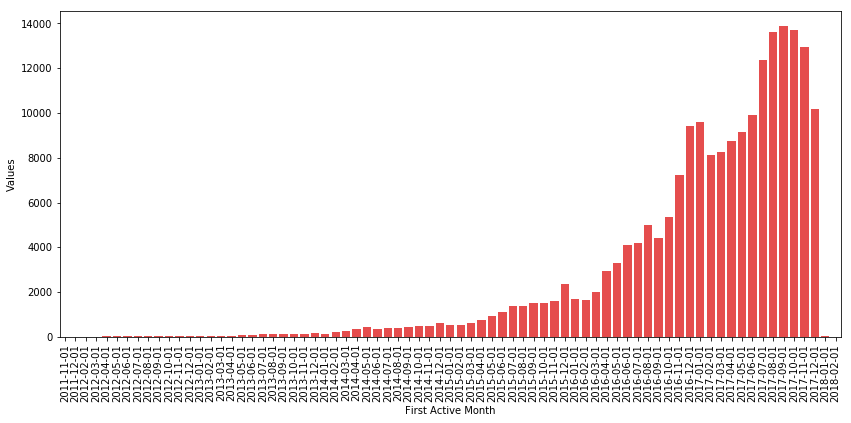

In [60]:
#Monthly distribution of target values for train set
cnt_month=train_set['first_active_month'].groupby(train_set.first_active_month.dt.date).agg('count')
cnt_month.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_month.index,cnt_month.values,alpha=0.8,color='red')
plt.xticks(rotation='vertical')
plt.xlabel('First Active Month')
plt.ylabel('Values')
plt.show()

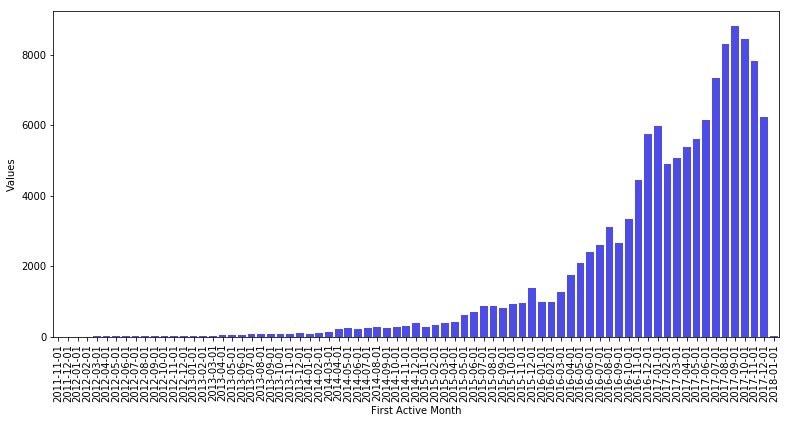

In [61]:
#monthly distribution of target values in test set
cnt_month_test=test_set['first_active_month'].groupby(test_set.first_active_month.dt.date).agg('count')
cnt_month_test.sort_index()
plt.figure(figsize=(13,6))
sns.barplot(cnt_month_test.index,cnt_month_test.values,alpha=0.8,color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('First Active Month')
plt.ylabel('Values')
plt.show()

[1, 2, 3, 4, 5]


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 

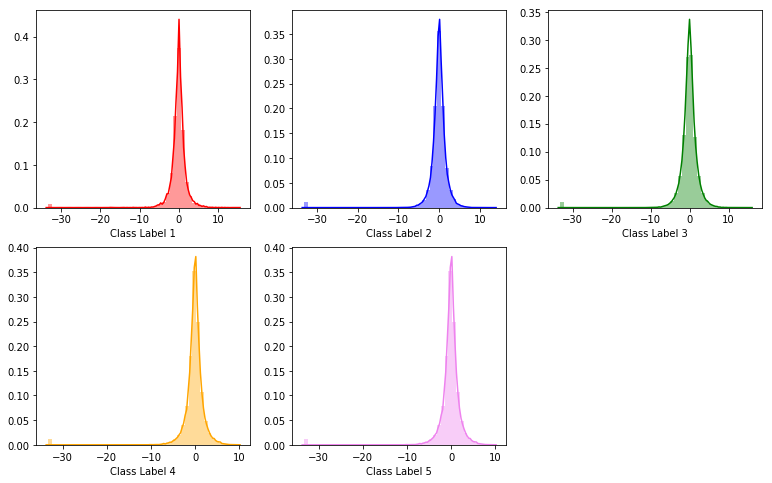

In [62]:
#Distribution of each class within each label
fig=plt.figure(figsize=(13,8))
class_vals=train_set['feature_1'].unique().tolist()
class_vals.sort()
print(class_vals)
class_1=train_set[train_set['feature_1']==class_vals[0]]

ax1=plt.subplot(2,3,1)
ax1=sns.distplot(class_1['target'].values,bins=50,kde=True,color='red')
plt.xlabel('Class Label 1')

class_2=train_set[train_set['feature_1']==class_vals[1]]
ax2=plt.subplot(2,3,2)
ax2=sns.distplot(class_2['target'].values,bins=50,kde=True,color='blue')
plt.xlabel('Class Label 2')

class_3=train_set[train_set['feature_1']==class_vals[2]]
ax2=plt.subplot(2,3,3)
ax2=sns.distplot(class_3['target'].values,bins=50,kde=True,color='green')
plt.xlabel('Class Label 3')

class_4=train_set[train_set['feature_1']==class_vals[3]]
ax3=plt.subplot(2,3,4)
ax3=sns.distplot(class_4['target'].values,bins=50,kde=True,color='orange')
plt.xlabel('Class Label 4')

class_5=train_set[train_set['feature_1']==class_vals[4]]
ax3=plt.subplot(2,3,5)
ax3=sns.distplot(class_4['target'].values,bins=50,kde=True,color='violet')
plt.xlabel('Class Label 5')


plt.show()

[1 2 3]


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


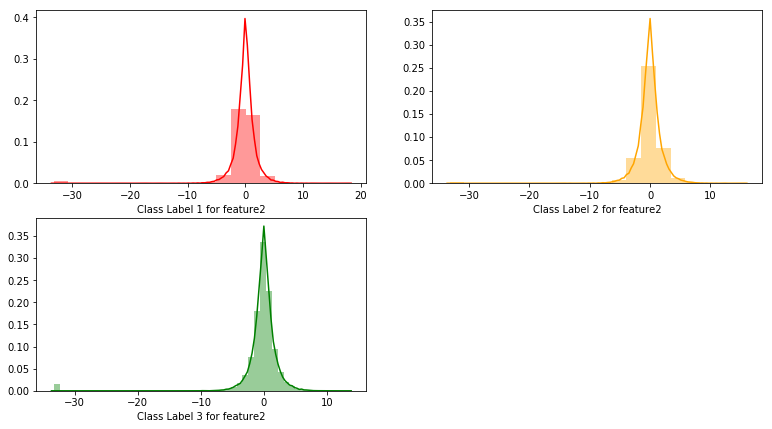

In [63]:
#distribution of each class within the feature2
plt.figure(figsize=(13,7))
class_vals=train_set['feature_2'].unique()
class_vals.sort()
print(class_vals)

class_label_1=train_set[train_set['feature_2']==class_vals[0]]


ax1=plt.subplot(2,2,1)
ax1=sns.distplot(class_label_1['target'].values,bins=20,kde=True,color='red')
plt.xlabel('Class Label 1 for feature2')

class_label_2=train_set[train_set['feature_2']==class_vals[1]]
ax1=plt.subplot(2,2,2)
ax1=sns.distplot(class_label_2['target'].values,bins=20,kde=True,color='orange')
plt.xlabel('Class Label 2 for feature2')

class_label_3=train_set[train_set['feature_2']==class_vals[2]]
ax1=plt.subplot(2,2,3)
ax1=sns.distplot(class_label_3['target'].values,bins=50,kde=True,color='green')
plt.xlabel('Class Label 3 for feature2')

plt.show()


In [64]:
#check the historical merchant transactions
hist_df=pd.read_csv('historical_transactions.csv')
hist_df.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [65]:
hist_df.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [66]:
df=hist_df.groupby('card_id')
df=df['purchase_amount'].size().reset_index()
df.columns=['card_id','num_of_transactions']
train_set=pd.merge(train_set,df,on='card_id',how='left')
test_set=pd.merge(test_set,df,on='card_id',how='left')

In [67]:
train_set.head(3)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_of_transactions
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,260
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,350
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,43


In [68]:
test_set.head(3)

,first_active_month,card_id,feature_1,feature_2,feature_3,num_of_transactions
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,68
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,78
2,2017-08-01,C_ID_b709037bc5,5,1,1,13


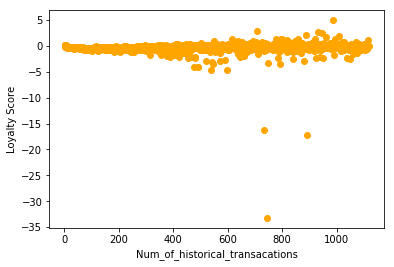

In [69]:
#mean of target as per the num of transactions
cnt=train_set.groupby('num_of_transactions')['target'].mean()
cnt=cnt.sort_index()
cnt_m=cnt[:-50]
plt.scatter(cnt_m.index,cnt_m.values,color='orange')
plt.xlabel('Num_of_historical_transacations')
plt.ylabel('Loyalty Score')
plt.show()


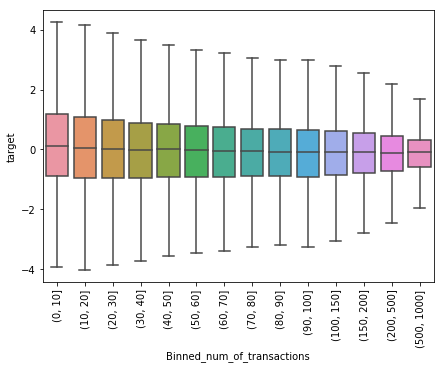

In [70]:
bin_vals=[0,10,20,30,40,50,60,70,80,90,100,150,200,500,1000]
train_set['binned_num_of_transactions']=pd.cut(train_set['num_of_transactions'],bin_vals)
cnt_srs=train_set.groupby('binned_num_of_transactions')['target'].mean()

#plot box plots
plt.figure(figsize=(7,5))
sns.boxplot(x='binned_num_of_transactions',y='target',data=train_set,showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('Binned_num_of_transactions')
plt.ylabel('target')
plt.show()

In [71]:
df1=hist_df.groupby('card_id')
df1=df1['purchase_amount'].agg(['sum','mean','std','min','max']).reset_index()
df1.head(3)
df1.columns=['card_id','hist_sum','hist_mean','hist_std','hist_min','hist_max']
#merge with original train_set
train_set=pd.merge(train_set,df1,on='card_id',how='left')
test_set=pd.merge(test_set,df1,on='card_id',how='left')

In [72]:
train_set.head(3)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_of_transactions,binned_num_of_transactions,hist_sum,hist_mean,hist_std,hist_min,hist_max
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",-165.968739,-0.638341,0.212139,-0.739395,2.258395
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",-210.006336,-0.600018,0.384967,-0.742400,4.630299
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",-29.167391,-0.678311,0.087380,-0.730138,-0.145847


In [73]:
test_set.head(3)

,first_active_month,card_id,feature_1,feature_2,feature_3,num_of_transactions,hist_sum,hist_mean,hist_std,hist_min,hist_max
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,68,-40.733733,-0.599025,0.192268,-0.743902,0.235676
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,78,-49.136513,-0.629955,0.154999,-0.731881,0.318817
2,2017-08-01,C_ID_b709037bc5,5,1,1,13,4.528840,0.348372,0.906547,-0.536537,2.525866


In [74]:
#merchant data set and find cnt,sum,std,min,max 
merchant_data=pd.read_csv('new_merchant_transactions.csv')
merchant_data.head(3)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14


In [75]:
#visualize the number of new merchant transaction distribution
nummerdf=merchant_data.groupby('card_id')['purchase_amount'].size().reset_index()
nummerdf.columns=['card_id','num_mer_transactions']
train_set=pd.merge(train_set,nummerdf,on='card_id',how='left')
test_set=pd.merge(test_set,nummerdf,on='card_id',how='left')

In [76]:
train_set.head(4)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_of_transactions,binned_num_of_transactions,hist_sum,hist_mean,hist_std,hist_min,hist_max,num_mer_transactions
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",-165.968739,-0.638341,0.212139,-0.739395,2.258395,23.0
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",-210.006336,-0.600018,0.384967,-0.742400,4.630299,6.0
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",-29.167391,-0.678311,0.087380,-0.730138,-0.145847,1.0
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,77,"(70, 80]",-49.491364,-0.642745,0.261624,-0.740897,1.445596,7.0


In [77]:
mdf=merchant_data.groupby('card_id')
mdf=mdf['purchase_amount'].agg(['sum','mean','std','min','max']).reset_index()
mdf.columns=['card_id','mer_sum','mer_mean','mer_std','mer_min','mer_max']
mdf.head(3)
train_set=pd.merge(train_set,mdf,on='card_id',how='left')
test_set=pd.merge(test_set,mdf,on='card_id',how='left')

In [78]:
train_set.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_of_transactions,binned_num_of_transactions,hist_sum,hist_mean,hist_std,hist_min,hist_max,num_mer_transactions,mer_sum,mer_mean,mer_std,mer_min,mer_max
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",-165.968739,-0.638341,0.212139,-0.739395,2.258395,23.0,-13.244202,-0.575835,0.135812,-0.724368,-0.296112
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",-210.006336,-0.600018,0.384967,-0.742400,4.630299,6.0,-4.355735,-0.725956,0.014326,-0.739410,-0.701858
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",-29.167391,-0.678311,0.087380,-0.730138,-0.145847,1.0,-0.700326,-0.700326,NaN,-0.700326,-0.700326
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,77,"(70, 80]",-49.491364,-0.642745,0.261624,-0.740897,1.445596,7.0,-4.654372,-0.664910,0.065882,-0.734135,-0.566740
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",-48.687656,-0.366073,1.352094,-0.746156,7.193041,36.0,-19.926237,-0.553507,0.223821,-0.739395,0.450886


In [79]:
test_set.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,num_of_transactions,hist_sum,hist_mean,hist_std,hist_min,hist_max,num_mer_transactions,mer_sum,mer_mean,mer_std,mer_min,mer_max
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,68,-40.733733,-0.599025,0.192268,-0.743902,0.235676,3.0,-1.777156,-0.592385,0.182843,-0.722114,-0.383266
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,78,-49.136513,-0.629955,0.154999,-0.731881,0.318817,9.0,-5.944698,-0.660522,0.071147,-0.740897,-0.506484
2,2017-08-01,C_ID_b709037bc5,5,1,1,13,4.528840,0.348372,0.906547,-0.536537,2.525866,2.0,0.180138,0.090069,1.151788,-0.724368,0.904506
3,2017-12-01,C_ID_d27d835a9f,2,1,0,26,-13.690715,-0.526566,0.219162,-0.731881,0.087965,10.0,-5.743674,-0.574367,0.073166,-0.671775,-0.447880
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,110,25.139384,0.228540,2.777764,-0.746758,15.782255,6.0,12.064997,2.010833,6.028671,-0.704082,14.279604


In [82]:
#save the new feature engineered train and test set
train_set.to_csv('new_train.csv')
test_set.to_csv('new_test.csv')